In [20]:
import torch
import numpy as np
from transformers import AutoModelForImageClassification, AutoImageProcessor
from sklearn.metrics import confusion_matrix
from torch.utils.data import DataLoader
from torchvision import datasets, transforms



#model_path='outputs/'
model_path='test_food/temp_outputs/'
test_folder_path = 'test_food/data/pizza_steak_sushi/test/'
#test_folder_path = 'test/'



model = AutoModelForImageClassification.from_pretrained(model_path)
image_processor = AutoImageProcessor.from_pretrained(model_path)
#encoding = image_processor(image_processor.convert('RGB'), return_tensors='pt')

# Assuming you have a test dataset and a trained model
data_transform = transforms.Compose([
    # Resize the images to 64x64
    transforms.Resize(size=(224, 224)),
    # Flip the images randomly on the horizontal
    transforms.CenterCrop(224),
    #transforms.RandomHorizontalFlip(p=0.5), # p = probability of flip, 0.5 = 50% chance
    # Turn the image into a torch.Tensor
    transforms.ToTensor(), # this also converts all pixel values from 0 to 255 to be between 0.0 and 1.0 
    transforms.Normalize(mean=image_processor.image_mean, std=image_processor.image_std)
])

# Set the device for computation
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

#test_dataset = YourTestDataset()  # Replace with your test dataset

test_dataset = datasets.ImageFolder(root=test_folder_path ,transform=data_transform)

#model = YourTrainedModel()  # Replace with your trained model

    
# Create a DataLoader for the test dataset
batch_size = 2  # Adjust as needed
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Switch model to evaluation mode
model.eval()

# Lists to store the logits and labels
all_logits = []
all_labels = []

counter = 0
# Iterate over the test dataset
for inputs, labels in test_dataloader:
    
    # Move inputs and labels to the appropriate device
    inputs = inputs.to(device)
    labels = labels.to(device)
    
    encoding = image_processor(inputs, return_tensors='pt')
    # Forward pass through the model
    with torch.no_grad():
        outputs = model.forward(**encoding)
        logits = outputs.logits
    #ogits = model(inputs)

    # Append the logits and labels to the lists
    all_logits.append(logits.cpu().numpy())
    all_labels.append(labels.cpu().numpy())

    counter = counter +1
#     if counter == 5:
#         break
    
# Concatenate the logits and labels into a single array
all_logits = np.concatenate(all_logits)
all_labels = np.concatenate(all_labels)

# Convert logits to predicted labels
predictions = np.argmax(all_logits, axis=1)

# Compute confusion matrix
confusion_mat = confusion_matrix(all_labels, predictions)

print("Confusion Matrix:")
print(confusion_mat)

ValueError: The image to be converted to a PIL image contains values outside the range [0, 1], got [-1.0, 1.0] which cannot be converted to uint8.

In [58]:
import torch
from torch.utils.data import DataLoader
from transformers import ViTFeatureExtractor, ViTForImageClassification

# Define your dataset and DataLoader here.
# Make sure your dataset returns images and labels for evaluation.

data_transform = transforms.Compose([
    # Resize the images to 64x64
    transforms.Resize(size=(224, 224)),
    # Flip the images randomly on the horizontal
    #transforms.CenterCrop(224),
    #transforms.RandomHorizontalFlip(p=0.5), # p = probability of flip, 0.5 = 50% chance
    # Turn the image into a torch.Tensor
    transforms.ToTensor(), # this also converts all pixel values from 0 to 255 to be between 0.0 and 1.0 
    #transforms.Normalize(mean=image_processor.image_mean, std=image_processor.image_std)
])

test_dataset = datasets.ImageFolder(root=test_folder_path,transform=data_transform)
batch_size = 2  # Adjust as needed
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)




#model_path='outputs/'
model_path='test_food/temp_outputs/'
test_folder_path = 'test_food/data/pizza_steak_sushi/test/'
#test_folder_path = 'test/'
num_classes = 3

# Load the ViT model and feature extractor
model_name = "facebook/convnext-tiny-224"  # You can use other ViT models from Huggingface's model hub
model = AutoModelForImageClassification.from_pretrained(model_name)
feature_extractor = AutoImageProcessor.from_pretrained(model_name)

# Device setup (use GPU if available)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
#model.to(device)

# Set model to evaluation mode
model.eval()

# Evaluation loop
total_correct = 0
total_samples = 0

all_logits =[]
all_labels =[]
with torch.no_grad():
    for inputs, labels in test_dataloader:
        
        
        inputs = inputs.to(device)
        labels = labels.to(device)
        # Extract features and classify
        encoded = feature_extractor(inputs, return_tensors='pt')
        outputs = model(**encoded)
        logits = outputs.logits

        # Get predictions
        _, predicted_labels = torch.max(logits, 1)

        # Calculate accuracy
        total_correct += (predicted_labels.to(device) == labels).sum().item()
        total_samples += labels.size(0)
    
        all_logits.append(logits.cpu().numpy())
        all_labels.append(labels.cpu().numpy())

        counter = counter +1
#     if counter == 5:
#         break
    
# Concatenate the logits and labels into a single array
all_logits = np.concatenate(all_logits)
all_labels = np.concatenate(all_labels)

# Convert logits to predicted labels
predictions = np.argmax(all_logits, axis=1)

# Compute confusion matrix
confusion_mat = confusion_matrix(all_labels, predictions)

print("Confusion Matrix:")
print(confusion_mat)
        
        
accuracy = total_correct / total_samples
print(f"Accuracy: {accuracy:.2f}")



Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.


Confusion Matrix:
[[ 0  0  0  1  2  1  5  0  0  0  1  0  0  0  0  1  0  0  4  3  1  0  0  0
   1  0  0  0  5  0]
 [ 0  0  0  0  0  0  4  0  1  1  0  0  1  1  1  0  1  0  4  2  0  0  0  0
   1  1  0  1  0  0]
 [ 0  0  0  0  0  0  2  1  0  0  0  2  0  2  0  0  0  1  6 11  0  1  1  1
   0  0  1  0  0  2]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 

In [56]:
inputs

tensor([[[[0.6549, 0.6510, 0.6471,  ..., 0.7216, 0.7137, 0.7020],
          [0.6510, 0.6510, 0.6471,  ..., 0.7216, 0.7176, 0.7098],
          [0.6588, 0.6588, 0.6549,  ..., 0.7255, 0.7255, 0.7176],
          ...,
          [0.8902, 0.8863, 0.8824,  ..., 0.7725, 0.7765, 0.7647],
          [0.8863, 0.8863, 0.8745,  ..., 0.7529, 0.7608, 0.7451],
          [0.8627, 0.8706, 0.8706,  ..., 0.7373, 0.7451, 0.7294]],

         [[0.7098, 0.7059, 0.7020,  ..., 0.8549, 0.8431, 0.8314],
          [0.7059, 0.7059, 0.7020,  ..., 0.8549, 0.8471, 0.8392],
          [0.7137, 0.7137, 0.7098,  ..., 0.8549, 0.8549, 0.8471],
          ...,
          [0.9804, 0.9882, 0.9882,  ..., 0.8510, 0.8588, 0.8471],
          [0.9843, 0.9882, 0.9804,  ..., 0.8314, 0.8353, 0.8235],
          [0.9608, 0.9725, 0.9804,  ..., 0.8078, 0.8196, 0.8078]],

         [[0.7608, 0.7569, 0.7490,  ..., 0.9020, 0.9020, 0.8980],
          [0.7569, 0.7569, 0.7451,  ..., 0.9020, 0.9059, 0.9059],
          [0.7647, 0.7647, 0.7608,  ..., 0

In [29]:
batch

[tensor([[[[-1.0000, -1.0000, -0.9922,  ..., -0.7804, -0.8118, -0.8510],
           [-0.9843, -0.9843, -0.9765,  ..., -0.7882, -0.8196, -0.8510],
           [-0.9294, -0.9373, -0.9451,  ..., -0.7882, -0.8196, -0.8510],
           ...,
           [-0.9608, -0.9608, -0.9608,  ..., -0.8196, -0.8275, -0.8353],
           [-0.9608, -0.9608, -0.9608,  ..., -0.8196, -0.8353, -0.8431],
           [-0.9608, -0.9608, -0.9608,  ..., -0.8196, -0.8353, -0.8431]],
 
          [[-0.9843, -0.9765, -0.9843,  ..., -0.9451, -0.9529, -0.9608],
           [-0.9922, -0.9843, -0.9843,  ..., -0.9529, -0.9608, -0.9686],
           [-0.9922, -0.9922, -0.9922,  ..., -0.9529, -0.9686, -0.9765],
           ...,
           [-0.9922, -0.9922, -0.9922,  ..., -0.9608, -0.9686, -0.9686],
           [-0.9922, -0.9922, -0.9922,  ..., -0.9608, -0.9686, -0.9608],
           [-0.9922, -0.9922, -0.9922,  ..., -0.9608, -0.9608, -0.9608]],
 
          [[-0.9922, -1.0000, -1.0000,  ..., -0.9922, -0.9843, -0.9765],
           [-

NameError: name 'batch' is not defined

In [13]:
from transformers import AutoModelForImageClassification, AutoImageProcessor

model = AutoModelForImageClassification.from_pretrained('outputs/')
image_processor = AutoImageProcessor.from_pretrained('outputs/')

In [54]:
image_processor


ViTImageProcessor {
  "do_normalize": true,
  "do_rescale": true,
  "do_resize": true,
  "image_mean": [
    0.5,
    0.5,
    0.5
  ],
  "image_processor_type": "ViTImageProcessor",
  "image_std": [
    0.5,
    0.5,
    0.5
  ],
  "resample": 2,
  "rescale_factor": 0.00392156862745098,
  "size": {
    "height": 224,
    "width": 224
  }
}

torch.Size([1, 3, 224, 224])

In [22]:
import torch
encoding = image_processor(image_file.convert('RGB'), return_tensors='pt')
encoding.pixel_values.shape
with torch.no_grad():
    outputs = model.forward(**encoding)
    logits = outputs.logits

In [29]:
predicted_class_index = logits.argmax(-1).item()
predicted_class_index

0

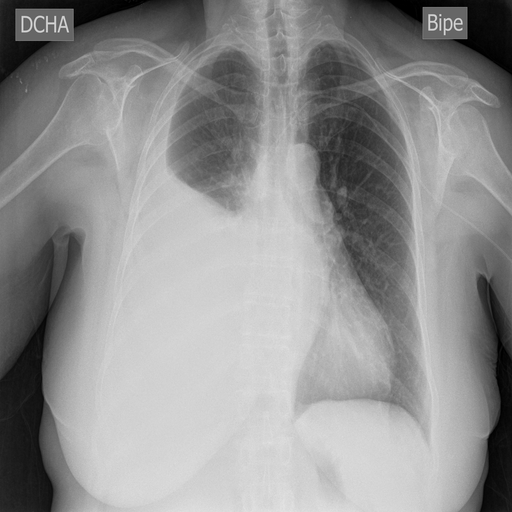

In [5]:
from PIL import Image


image_file = 'temp_test/0a60c7787fee.png'
image_file = Image.open(image_file)
image_file

In [50]:
from transformers import ViTImageProcessor, ViTForImageClassification
from PIL import Image
import requests

#url = 'http://images.cocodataset.org/val2017/000000039769.jpg'
#image = Image.open(requests.get(url, stream=True).raw)



t_processor = ViTImageProcessor.from_pretrained('google/vit-base-patch16-224')
t_model = ViTForImageClassification.from_pretrained('google/vit-base-patch16-224')

t_inputs = processor(images=image, return_tensors="pt")
t_outputs = model(**t_inputs)
t_logits = outputs.logits
# model predicts one of the 1000 ImageNet classes
predicted_class_idx = t_logits.argmax(-1).item()
print("Predicted class:", model.config.id2label[predicted_class_idx])

Predicted class: sushi


In [53]:
t_inputs

{'pixel_values': tensor([[[[ 0.1137,  0.1686,  0.1843,  ..., -0.1922, -0.1843, -0.1843],
          [ 0.1373,  0.1686,  0.1843,  ..., -0.1922, -0.1922, -0.2078],
          [ 0.1137,  0.1529,  0.1608,  ..., -0.2314, -0.2235, -0.2157],
          ...,
          [ 0.8353,  0.7882,  0.7333,  ...,  0.7020,  0.6471,  0.6157],
          [ 0.8275,  0.7961,  0.7725,  ...,  0.5843,  0.4667,  0.3961],
          [ 0.8196,  0.7569,  0.7569,  ...,  0.0745, -0.0510, -0.1922]],

         [[-0.8039, -0.8118, -0.8118,  ..., -0.8902, -0.8902, -0.8980],
          [-0.7882, -0.7882, -0.7882,  ..., -0.8745, -0.8745, -0.8824],
          [-0.8118, -0.8039, -0.7882,  ..., -0.8902, -0.8902, -0.8902],
          ...,
          [-0.2706, -0.3176, -0.3647,  ..., -0.4275, -0.4588, -0.4824],
          [-0.2706, -0.2941, -0.3412,  ..., -0.4824, -0.5451, -0.5765],
          [-0.2784, -0.3412, -0.3490,  ..., -0.7333, -0.7804, -0.8353]],

         [[-0.5451, -0.4667, -0.4824,  ..., -0.7412, -0.6941, -0.7176],
          [-0

In [132]:
from transformers import ViTImageProcessor, ViTForImageClassification, AutoImageProcessor
from PIL import Image
import requests


a_image_path='test_food/data/pizza_steak_sushi/test/pizza/194643.jpg'

image_file = Image.open(a_image_path).convert('RGB')
model_path='test_food/temp_outputs/'

#t_processor = ViTImageProcessor.from_pretrained(model_path)
t_model = ViTForImageClassification.from_pretrained(model_path)




t_inputs = t_processor(images=image_file, return_tensors="pt")
t_outputs = model(**t_inputs)
t_logits = t_outputs.logits
# model predicts one of the 1000 ImageNet classes
predicted_class_idx = t_logits.argmax(-1).item()
print("Predicted class:", model.config.id2label[predicted_class_idx])

Predicted class: pizza


In [131]:
t_processor

ViTImageProcessor {
  "do_normalize": true,
  "do_rescale": true,
  "do_resize": true,
  "image_mean": [
    0.5,
    0.5,
    0.5
  ],
  "image_processor_type": "ViTImageProcessor",
  "image_std": [
    0.5,
    0.5,
    0.5
  ],
  "resample": 2,
  "rescale_factor": 0.00392156862745098,
  "size": {
    "height": 224,
    "width": 224
  }
}

# BARD example